<a href="https://colab.research.google.com/github/AlpaslanErdag/Autonomous-Car-2022MLIS2/blob/main/MLiSII_Auto_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AlpaslanErdag/cardata  # CLONING DATA FROM GITHUB

Cloning into 'cardata'...
remote: Enumerating objects: 14949, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 14949 (delta 25), reused 20 (delta 10), pack-reused 14897
Receiving objects: 100% (14949/14949), 1.64 GiB | 29.77 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Checking out files: 100% (14938/14938), done.


In [2]:
!pip3 install imgaug


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam # - Works
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense,Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import glob
import random

In [4]:
from google.colab import files


In [12]:
######################################################
### FOR SPEED PREDICTION

print(data.iloc[13])
def load_speed_img(datadir, df):
  image_path1 = []
  speed1 = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    image_id = indexed_data[0]
    image_path1.append(os.path.join(datadir,image_id))
    #angle.append(float(indexed_data[1]))
    speed1.append((indexed_data[2]))
  image_paths1 = np.asarray(image_path1)
  #angles = np.asarray(angle)
  speeds1= np.asarray(speed1)
  return image_paths1,speeds1

image_id    14.png
angle       0.8750
speed            1
Name: 13, dtype: object


In [22]:
image_paths,speeds= load_speed_img(datadir + '/training_data/training_data', data)

In [23]:
X_train1,X_valid1,y_train1,y_valid1= train_test_split(image_paths,speeds,test_size=0.2,random_state=3)
image_paths

array(['cardata/training_data/training_data/1.png',
       'cardata/training_data/training_data/2.png',
       'cardata/training_data/training_data/3.png', ...,
       'cardata/training_data/training_data/13796.png',
       'cardata/training_data/training_data/13797.png',
       'cardata/training_data/training_data/13798.png'], dtype='<U45')

In [56]:
def process_image(path):
    '''Read the image's path and return the image'''
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=3)
    image = image/255
    #tf.reshape(image,(224,224,3))
    return image

In [57]:
def image_data_generator(image_paths, steering_angles, batch_size):
    while True:
        batch_images = []
        batch_steering_angles = []
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            image_path = image_paths[random_index]
            steering_angle = steering_angles[random_index]
            image = process_image(image_path)
            batch_images.append(image)
            batch_steering_angles.append(steering_angle)
        yield( np.asarray(batch_images), np.asarray(batch_steering_angles))

In [20]:
######### PART-1 #########
##########################
datadir= 'cardata'
colums= ['image_id','angle','speed']
data=pd.read_csv(os.path.join(datadir,'training_norm3.csv'))
data.head()

image_id  angle  speed
0    1.png 0.4375      0
1    2.png 0.8125      1
2    3.png 0.4375      1
3    4.png 0.6250      1
4    5.png 0.5000      0

In [24]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

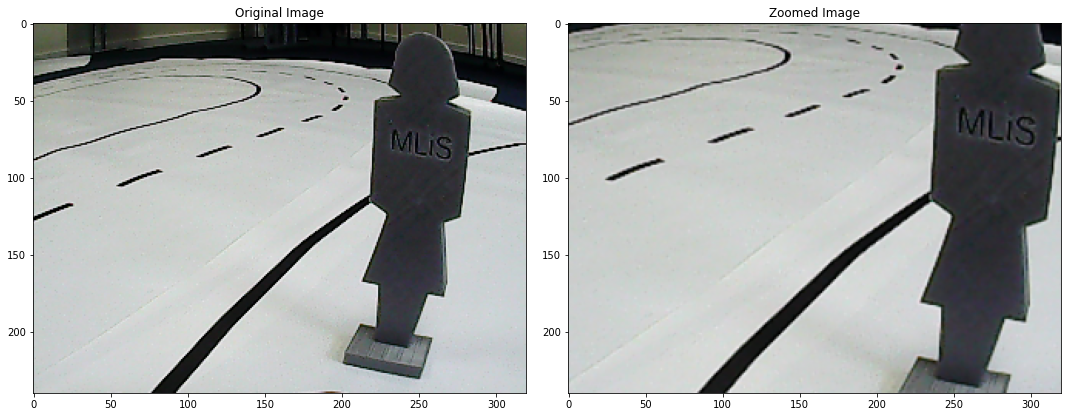

In [25]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [26]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

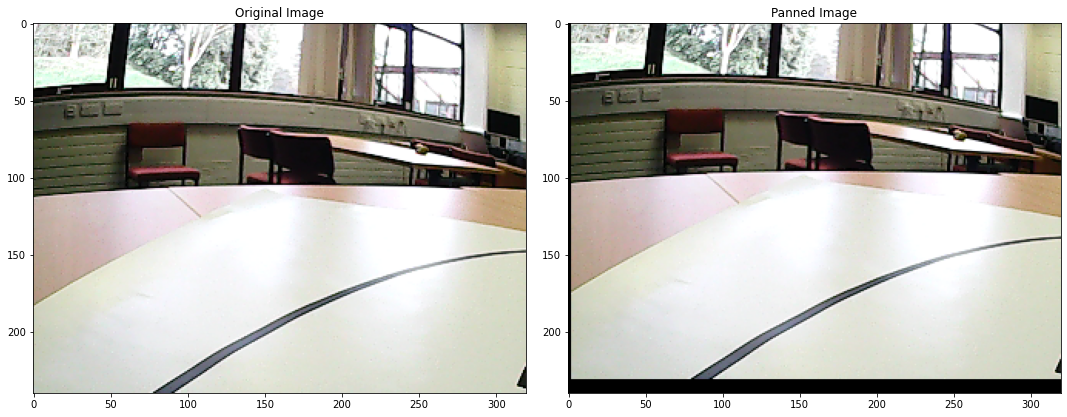

In [27]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [28]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Brightness altered image ')

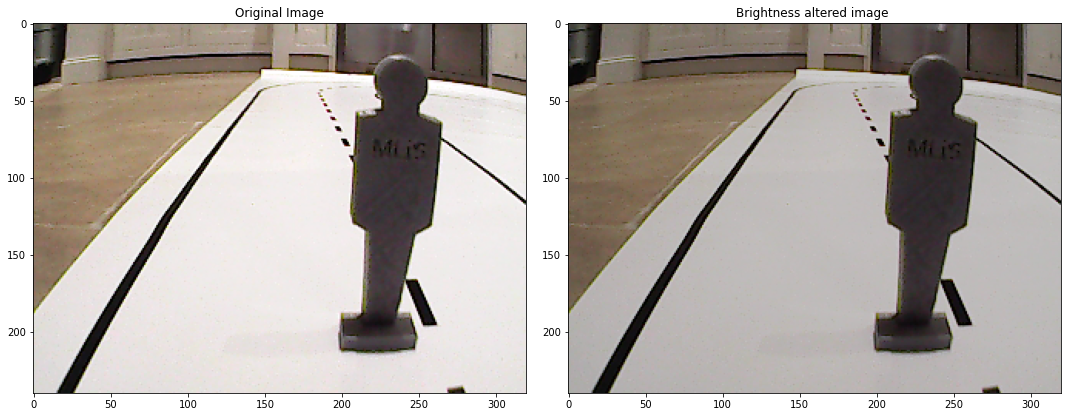

In [29]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

In [40]:
def img_random_flip(image, angle):
    image = cv2.flip(image,1)
    angle = 1-angle
    return image, angle

In [42]:
print(data.iloc[3])
def load_img_steering(datadir, df):
  image_path = []
  angle = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    image_id = indexed_data[0]
    image_path.append(os.path.join(datadir,image_id))
    angle.append(float(indexed_data[1]))
    #speed.append((indexed_data[2]))
  image_paths = np.asarray(image_path)
  angles = np.asarray(angle)
  #speeds= np.asarray(speed)
  image_ids= np.asarray(image_id)
  return image_paths, angles

image_id    4.png
angle      0.6250
speed           1
Name: 3, dtype: object


In [43]:
image_paths11,angles= load_img_steering(datadir + '/training_data/training_data', data)


In [44]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
angle= angles[random_index]

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.25')

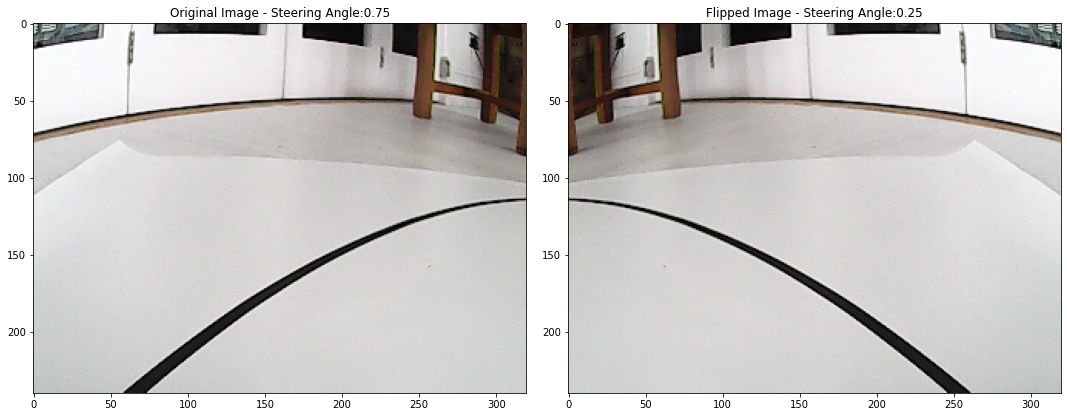

In [45]:
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [46]:
def blur(image):
    kernel_size = random.randint(1, 5)  # kernel larger than 5 would make the image way too blurry
    image = cv2.blur(image,(kernel_size, kernel_size))
   
    return image

In [47]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
angle= angles[random_index]

Text(0.5, 1.0, 'Blurred image ')

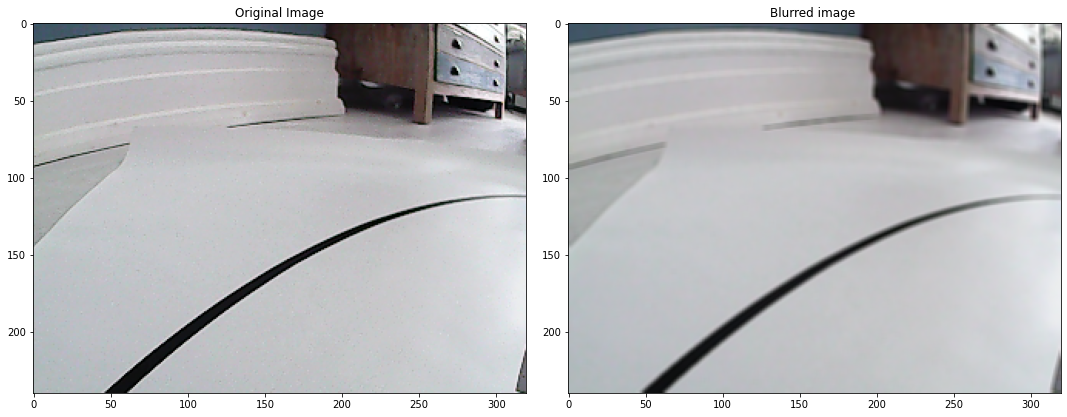

In [48]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
blurred_image = blur(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(blurred_image)
axs[1].set_title('Blurred image ')

In [49]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = blur(image)      
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

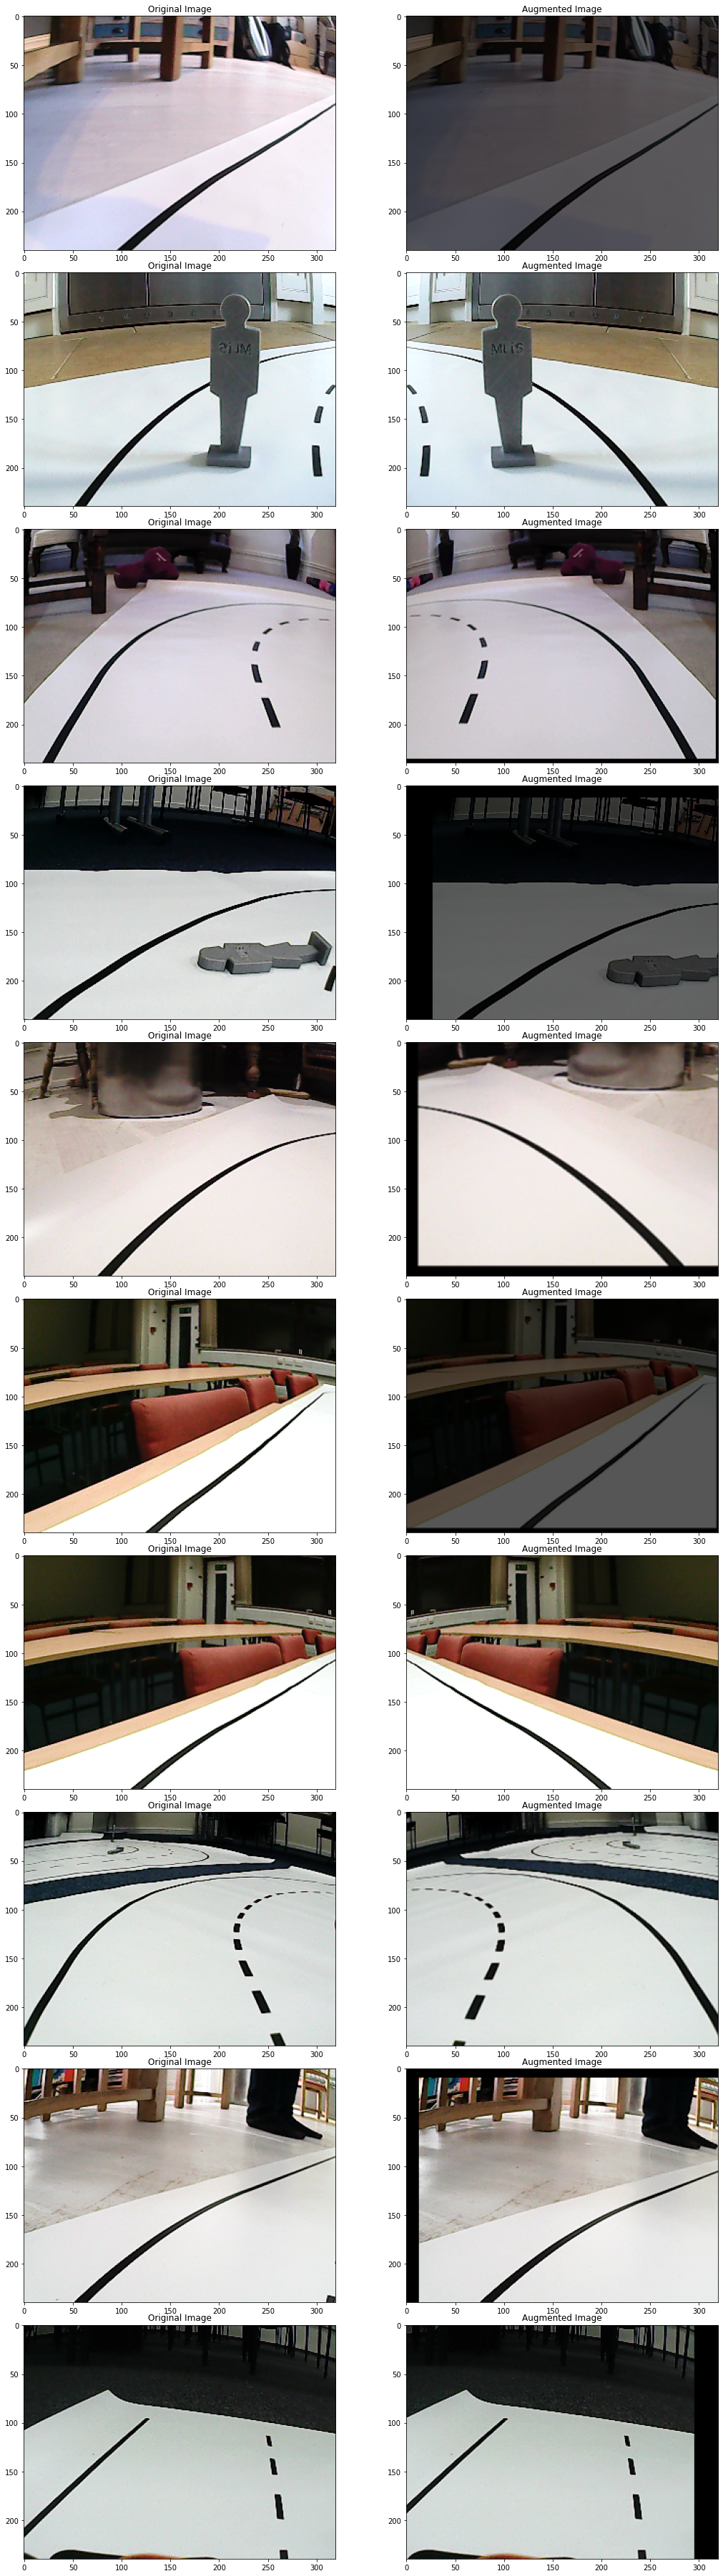

In [50]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = angles[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

Text(0.5, 1.0, 'Preprocessed Image')

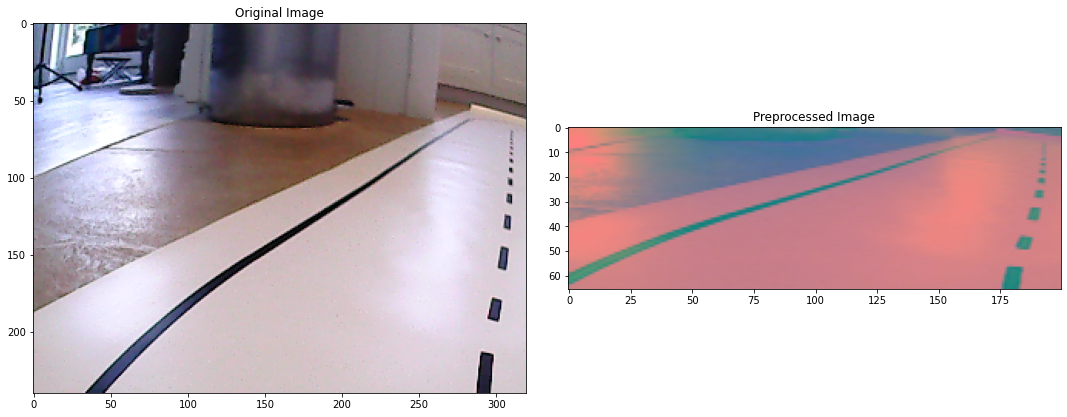

In [51]:
def img_preprocess(img):
    img = img[50:,50:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    #img = img /255.0 
    #img = np.true_divide(image, 255, dtype=np.float32,casting="unsafe")
    return img
    
image = image_paths[165]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [52]:
from keras.applications.inception_v3 import InceptionV3
incept_speed= InceptionV3(input_shape = (224,224,3),weights='imagenet',include_top=False)
incept_speed.trainable = False

87924736/87910968 [==============================] - 1s 0us/step


In [53]:
from keras.layers import Dense, GlobalAveragePooling2D 
from keras.regularizers import l1,l2
for layer in incept_speed.layers[290:]: 
    layer.trainable = True 
y = GlobalAveragePooling2D()(incept_speed.output)
# y = Flatten()(incept_speed.output)
y = Dense(1024, activation ='relu')(y)
# let's add a fully-connected layer as first layer
y = Dense(256, activation ='relu')(y)
y = Dense(64, activation ='relu')(y)
y = Dense(32, activation ='relu')(y)
# y = Dense(1024, activation ='relu')#,kernel_regularizer=l1(0.0001), bias_regularizer=l1(0.0001))(y)
# y = Dense(256, activation ='relu')#,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(y)
# y = Dense(64, activation ='relu')#,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(y)
# y = Dense(32, activation ='relu')#,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(y)
# y = Dense( 32, activation ='relu')(y)
pred_speed = Dense(1,activation ='sigmoid')(y)

In [54]:
from keras.models import Model
my_inc_speed = Model(inputs = incept_speed.input,outputs=pred_speed)
my_inc_speed.summary()
loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
my_inc_speed.compile(optimizer = 'adam',loss="mse",metrics=["mse"])
my_inc_speed.optimizer.learning_rate = 0.000002

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [58]:
history = my_inc_speed.fit_generator(image_data_generator(X_train1, y_train1, batch_size=50),
                              steps_per_epoch=500, epochs=20,
                              validation_data = image_data_generator(X_valid1,y_valid1, batch_size=50),
                              validation_steps=500,
                              verbose=1, shuffle=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
500/500 [==============================] - 361s 689ms/step - loss: 0.1123 - mse: 0.1123 - val_loss: 0.0585 - val_mse: 0.0585
Epoch 2/20
500/500 [==============================] - 341s 684ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 3/20
500/500 [==============================] - 345s 691ms/step - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 4/20
500/500 [==============================] - 339s 680ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 5/20
500/500 [==============================] - 337s 676ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 6/20
500/500 [==============================] - 336s 673ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 7/20
500/500 [==============================] - ETA: 0s - loss: 0.0184 - mse: 0.0184

KeyboardInterrupt: ignored

Text(0.5, 0, 'Epoch')

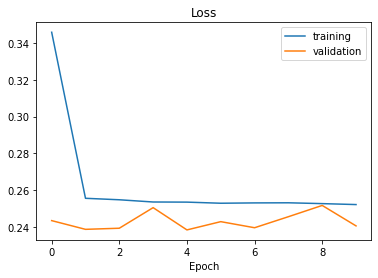

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
########## SAVING MODEL AND DOWNLOAD TO LOCAL #####
my_inc_speed.save('modelforSpeed0305.h5')
from google.colab import files
files.download('modelforSpeed0305.h5')

FileNotFoundError: ignored

In [ ]:
# Mount my Google Drive.  It will ask for an authenticate code
### BEFORE THIS DONT FORGET TO UPLOAD MODEL FILE TO DRIVE
from google.colab import drive
drive.mount('/content/gdrive')
model_output_dir = '/content/gdrive/My Drive/Colab Notebooks'

Mounted at /content/gdrive


In [ ]:
from keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
modelSpeed = load_model(f'{model_output_dir}/modelforSpeed0305.h5')

In [ ]:
########## SAVING MODEL AND DOWNLOAD TO LOCAL #####
model20.save('modelforSpeed24041.h5')
from google.colab import files
files.download('modelforSpeed22041.h5')

In [ ]:
# Mount my Google Drive.  It will ask for an authenticate code
### BEFORE THIS DONT FORGET TO UPLOAD MODEL FILE TO DRIVE
from google.colab import drive
drive.mount('/content/gdrive')
model_output_dir = '/content/gdrive/My Drive/Colab Notebooks'